# Introduction
The Association of Zoos and Aquariums (AZA) is a non-profit, independent accrediting organization representing more than 250 facilities in the United States and internationally. These facilities may participate in any of the AZA’s many cooperatively managed Species Survival Plan (SSP) programs, which are established to manage a species’ ex situ (meaning “outside of its natural habitat” - e.g. in zoos) population. 

The International Union for Conservation of Nature (IUCN), which is composed of both governmental and non-governmental organizations, is the global authority on the status of the natural world. The IUCN’s Red List of Threatened Species is the world’s most comprehensive source of information on the global extinction risk status of animal, fungus, and plant species. Evaluated species are classified into one of eight categories: 
- Extinct (EX)
- Extinct in the Wild (EW)
- Critically Endangered (CR)
- Endangered (EN)
- Vulnerable (VU)
- Near Threatened (NT)
- Least Concern (LC)
- Data Deficient (DD)

Additionally, the direction of change of a species’ population size over time is assessed and categorized as one of the following:

- Increasing
- Decreasing
- Stable
- Unknown
- Unspecified

This goal of this project is to analyze animal species with dedicated AZA SSPs and their IUCN Red List global extinction risk statuses to determine if SSPs prioritize the world’s most vulnerable species. 

### Import Libraries

In [310]:
import pandas as pd
import matplotlib.pyplot as plt

### Read Data

In [311]:
ssp_df = pd.read_csv('0225_aza_ssp.csv')
redlist_df = pd.read_csv('0225_iucn_assessments.csv')
print(ssp_df.shape, redlist_df.shape)

(285, 7) (285, 8)


### Clean Data

In [312]:
def clean_ssp(ssp_df: pd.DataFrame) -> pd.DataFrame:
    """ 
    Clean ssp DataFrame by dropping unneeded columns, checking for and removing null and duplicate values, stripping white space, and normalizing case.
    Args: 
        ssp_df (pd.DataFrame): SSP data.
    Returns: 
        pd.DataFrame: Cleaned SSP data.
    """
    ssp_df = ssp_df.drop(
    ['program_type',
     'genus_name',
     'species_name',
     'subspecies'],
    axis=1)

    if ssp_df.isnull().any().any():
        ssp_df = ssp_df.fillna('Null')

    if ssp_df['scientific_name'].duplicated().any():
        ssp_df = ssp_df.drop_duplicates(subset=['scientific_name'])

    for column in ssp_df.columns: 
        if ssp_df[column].dtype == 'object': 
            ssp_df[column] = ssp_df[column].str.strip().str.upper()

    return ssp_df

def clean_redlist(redlist_df: pd.DataFrame) -> pd.DataFrame:
    """ 
    Clean redlist DataFrame by dropping unneeded columns, checking for and removing null and duplicate values, stripping white space, and normalizing case.
    Args: 
        redlist_df (pd.DataFrame): Red List data.
    Returns: 
        pd.DataFrame: Cleaned Red List data.
    """
    redlist_df = redlist_df.drop(
    ['taxon',
     'common_name',
     'genus_name',
     'species_name',
     'assessment_scope'],
    axis=1)

    if redlist_df.isnull().any().any():
        redlist_df = redlist_df.fillna('Null')

    if redlist_df['scientific_name'].duplicated().any():
        redlist_df = redlist_df.drop_duplicates(subset=['scientific_name'])

    for column in redlist_df.columns: 
        if redlist_df[column].dtype == 'object': 
            redlist_df[column] = redlist_df[column].str.strip().str.upper()

    return redlist_df

In [313]:
ssp_df = clean_ssp(ssp_df)
redlist_df = clean_redlist(redlist_df)
print(ssp_df.shape, redlist_df.shape)

(278, 3) (278, 3)


### Merge Data

In [314]:
redlist_df = redlist_df.set_index('scientific_name')
ssp_df = ssp_df.set_index('scientific_name')
ssp_by_redlist = ssp_df.join(redlist_df, lsuffix='_SSP', rsuffix='_RL')
ssp_by_redlist

,taxon,common_name,assessment,population_trend
scientific_name,,,,
ORYCTEROPUS AFER,MAMMAL,AARDVARK,LC,UNKNOWN
ADDAX NASOMACULATUS,MAMMAL,ADDAX,CR,DECREASING
DASYPROCTA LEPORINA,MAMMAL,"AGOUTI, BRAZILIAN",LC,STABLE
ALLIGATOR SINENSIS,REPTILE,"ALLIGATOR, CHINESE",CR,STABLE
MYRMECOPHAGA TRIDACTYLA,MAMMAL,"ANTEATER, GIANT",VU,DECREASING
...,...,...,...,...
CHRYSOCYON BRACHYURUS,MAMMAL,"WOLF, MANED",NT,UNKNOWN
PHOENICULUS PURPUREUS,BIRD,"WOODHOOPOE, GREEN",LC,DECREASING
EQUUS GREVYI,MAMMAL,"ZEBRA, GREVY'S",EN,STABLE


### Visualization

In [315]:
def extinction_risk_pie(ssp_by_redlist: pd.DataFrame) -> None:
    """
    Generates a pie chart displaying the distribution of species across extinction risk categories. 
    Args: 
        ssp_by_redlist (pd.DataFrame): Merged SSP and Red List DataFrames. 
    Returns: 
        None: Displays a pie chart. 
    """
    assessment_count = ssp_by_redlist.groupby('assessment').assessment.count()

    labels = assessment_count.index
    values = assessment_count.values
    colors = ['#e07a5f', '#f4f1de', '#3d405b', '#5f797b', '#81b29a', '#f2cc8f']

    fig, ax = plt.subplots(figsize=(10, 10)) 
    ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
    ax.set_title('Species Distribution by Extinction Risk Status')

def population_trend_pie(ssp_by_redlist: pd.DataFrame) -> None: 
    """ 
    Generates a pie chart displaying the distribution of species across population trend categories. 
    Args: 
        ssp_by_redlist (pd.Dataframe): Merged SSP and Red List DataFrames.
    Returns: 
        None: Displays a pie chart. 
    """
    population_trend_count = ssp_by_redlist.groupby('population_trend').population_trend.count()

    labels = population_trend_count.index
    values = population_trend_count.values
    colors = ['#e07a5f', '#3d405b', '#5f797b', '#81b29a', '#f2cc8f']

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
    ax.set_title('Species Distribution by Population Trend')

def risk_and_trend_bar(ssp_by_redlist: pd.DataFrame) -> None:
    """
    Generates a bar chart displaying the distribution of species across extinction risk and population trend categories. 
    Args: 
        ssp_by_redlist (pd.DataFrame): Merged SSP and Red List DataFrames. 
    Returns: 
        None: Displays a bar chart
    """
    assessment_and_trend = ssp_by_redlist.groupby(['assessment', 'population_trend']).assessment.count()

    labels = [f'{a} ({t})' for a, t in assessment_and_trend.index]
    values = assessment_and_trend.values
    colors = ['#e07a5f', '#e07a5f', '#e07a5f', '#e07a5f', '#e07a5f', '#f4f1de', '#3d405b', '#3d405b', '#3d405b', '#3d405b', '#5f797b', '#5f797b', '#5f797b', '#5f797b', '#81b29a', '#81b29a', '#f2cc8f', '#f2cc8f', '#f2cc8f', '#f2cc8f']

    fig, ax = plt.subplots(figsize=(10, 10))
    bars = ax.bar(labels, values, color=colors)

    plt.xlabel('Extinction Risk Status and Population Trend')
    plt.ylabel('Percentage of Species')
    plt.title('Species Distribution by Extinction Risk Status and Population Trend')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    for bar in bars:
        height = bar.get_height()
        label = f'{height:.1f}%' 
        plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom', fontsize=10, rotation=60)

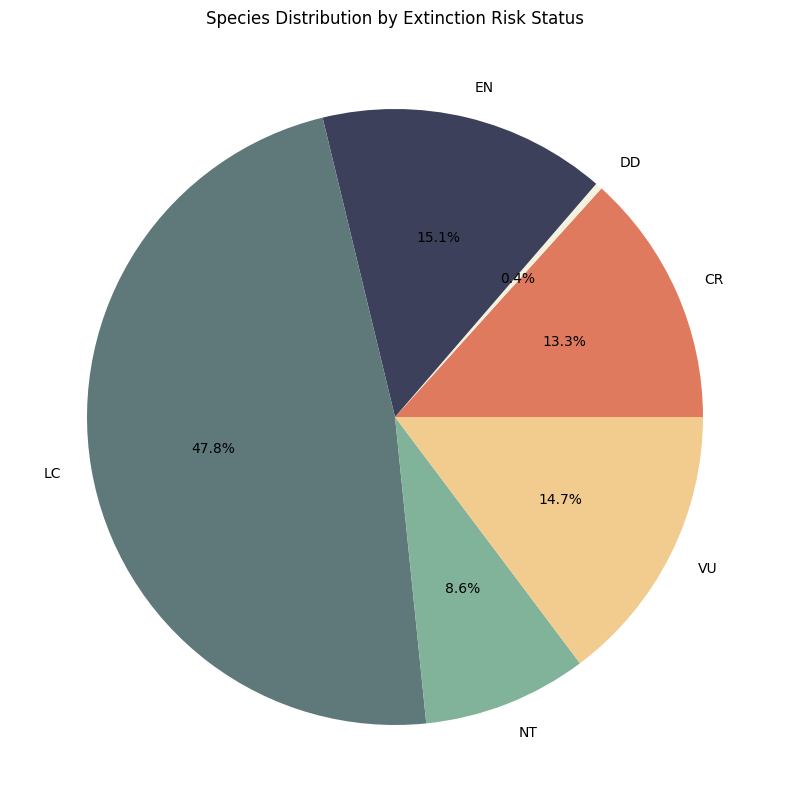

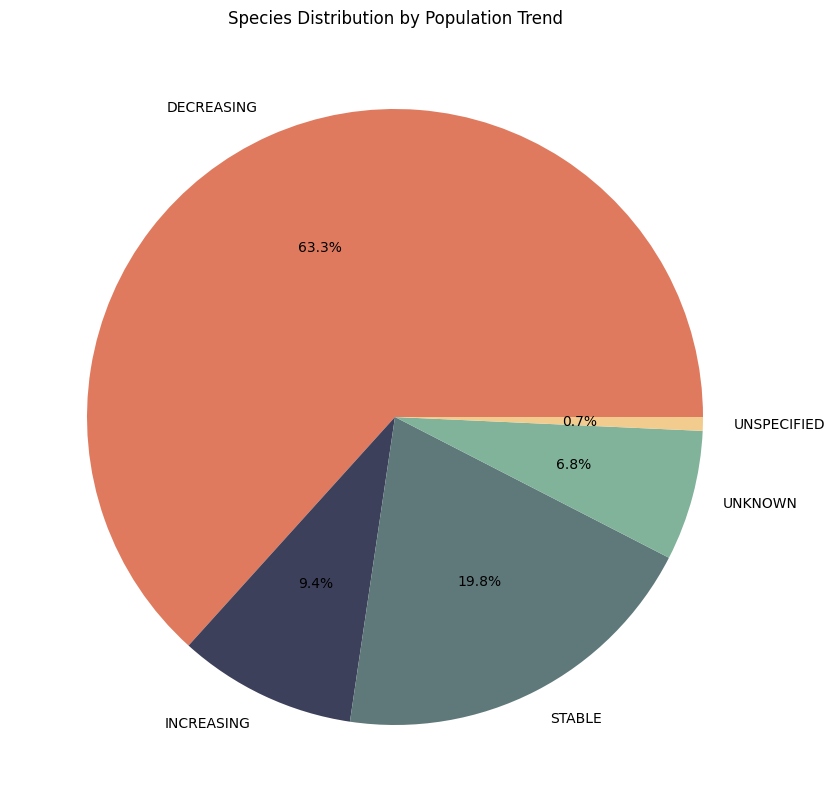

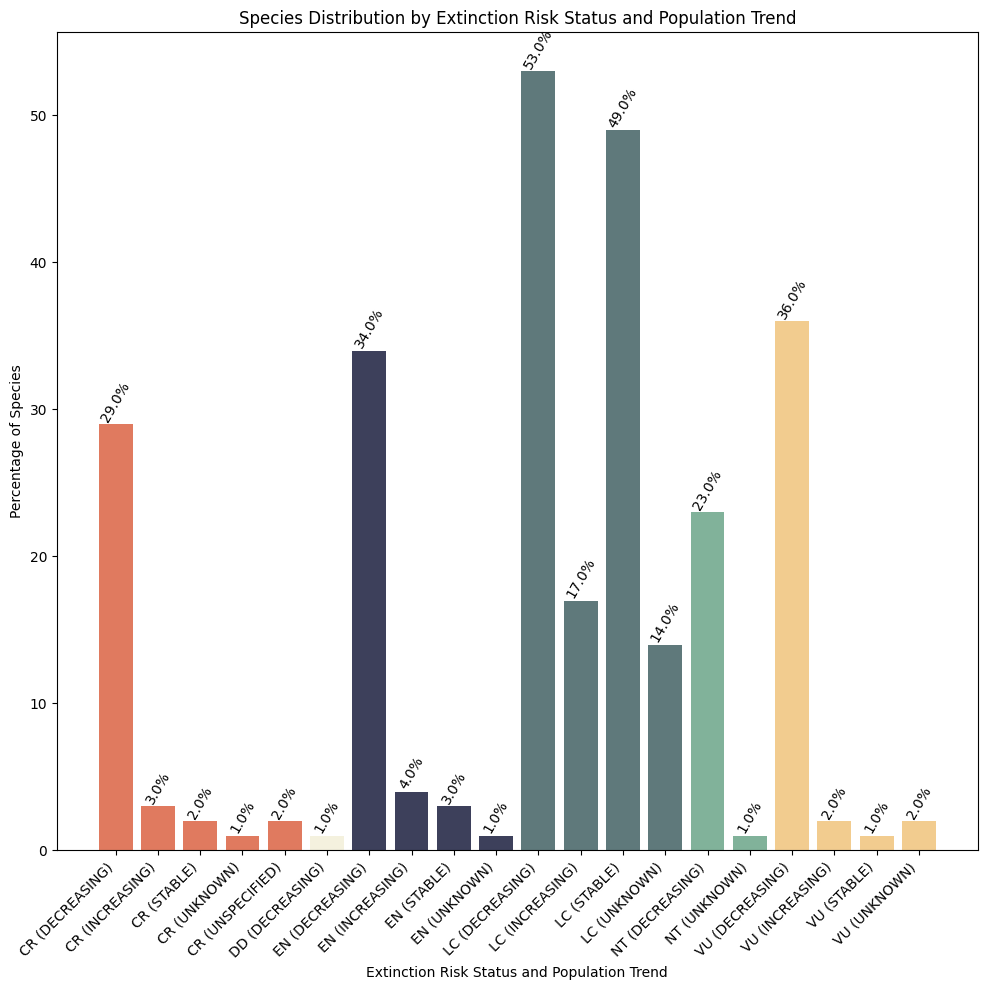

In [316]:
extinction_risk_pie(ssp_by_redlist)
population_trend_pie(ssp_by_redlist)
risk_and_trend_bar(ssp_by_redlist)

# Discussion

### Summary 

The purpose of this project was to analyze animal species with dedicated AZA SSPs and their IUCN Red List global extinction risk statuses to determine if SSPs prioritize the world’s most vulnerable species.

To complete this analysis, I created two datasets: one with information retrieved from the Association of Zoos and Aquariums’ Animal Program Database and one with information retrieved from the International Union for Conservation of Nature’s Red List of Threatened species.

This data was read, cleaned, manipulated, and analyzed using Pandas. All visualizations were created using Matplotlib. A data dictionary for each dataset is included in the repository, and instructions on how to run the project using a virtual environment can be found in the README.

### Findings

As can be seen from the pie chart titled ‘Species Distribution by Extinction Risk Status’, over half of all species with dedicated SSPs are classified as ‘near threatened’ or ‘least concern’, the 2 categories least at risk of extinction. Conversely, the populations of over half of the species with dedicated SSPs are classified as ‘decreasing’, which can be seen from the pie chart titled ‘Species Distribution by Population Trend’. The bar chart titled ‘Species Distribution by Extinction Risk Status and Population Trend’ unites these results and visualizes the percentage of SSP species that are classified as each unique combination of extinction risk status and population trend.

### Implications 

The results of my analysis suggest that species with dedicated SSPs are likely to be those faced with a low risk of extinction but a population that is decreasing in size. Whether these parameters are taken into account when determining which species to establish SSPs for remains unknown.

It is important to note that SSPs are not the only avenue by which AZA facilities protect vulnerable species. Although a species may not have its own SSP, it is likely safeguarded by at least one of the AZA’s many other conservation initiatives.

### Future Plans

I plan to continue working on and improving this project in the coming months. My first course of action will be rework instances in which I manually entered data rather than referencing an object. I would also like to explore other methods of creating visualizations, perhaps by creating a tableau dashboard. Ultimately, I would like to convert all tasks into custom functions to improve performance.